<a href="https://colab.research.google.com/github/haddybhaiya/unsupervised-learning-classes/blob/main/pca_demo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!unzip digit-recognizer.zip

Archive:  digit-recognizer.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sample_submission.csv   
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


In [8]:
import pandas as pd
df = pd.read_csv('/content/train.csv')

In [9]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
24371,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df.shape

(42000, 785)

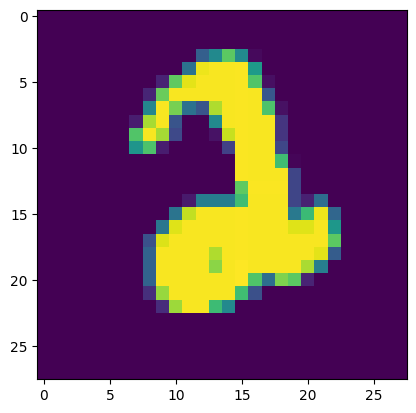

In [12]:
import matplotlib.pyplot as plt
plt.imshow(df.iloc[8527,1:].values.reshape(28,28))

In [14]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [16]:
X_train.shape

(33600, 784)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [18]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time()-start)


18.40218758583069


In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [21]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# pca
from sklearn.decomposition import PCA
pca = PCA(n_components = 200)

In [23]:
X_train_trf = pca.fit_transform(X_train_scaled)
X_test_trf = pca.transform(X_test_scaled)

In [27]:
X_train_trf.shape

(33600, 200)

In [28]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [30]:
y_pred = knn.predict(X_test_trf)

In [32]:
accuracy_score(y_test,y_pred)

0.9507142857142857

In [ ]:
accuracy_score(y,y_pred)

In [35]:
for i in range(1,785):
  pca = PCA(n_components =i)
  X_train_trf = pca.fit_transform(X_train_scaled)
  X_test_trf = pca.transform(X_test_scaled)
  knn.fit(X_train_trf,y_train)
  y_pred = knn.predict(X_test_trf)
  maxi = 0
  for i in range(1,10):
    if accuracy_score(y_test,y_pred)>maxi:
      maxi = accuracy_score(y_test,y_pred)
      print(maxi)
      print(i)




KeyboardInterrupt: 

In [39]:
# transforming to a 2D coordinate syste,
pca = PCA(n_components = 2)
X_train_trf = pca.fit_transform(X_train_scaled)
X_test_trf = pca.transform(X_test_scaled)


In [40]:
X_train_trf

array([[-2.71863253, -0.48982409],
       [-0.67698015, -6.75362491],
       [-3.03323281,  6.50981624],
       ...,
       [ 2.14883643,  0.78079444],
       [ 1.05957006,  0.94767312],
       [17.70258446,  1.96188185]])

In [43]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],y=X_train_trf[:,1],color=y_train_trf,color_discrete_sequence=px.colors.qualitative.G10)
fig.show()
